In [1]:
import dynamiqs as dq
import scipy as sp
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import scipy.constants

import qbraid




In [2]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [5]:
na = 20
nb = 5
ω_a0 = 2*jnp.pi*5.26
ω_b0 = 2*jnp.pi*7.70
 
φ_a = 0.06
φ_b = 0.29

h = 1

Kb = 2.6e-3
Ka = 9.3e-6
E_J = 42.76e3* h
 
ΔE_J = 0.47e3 * h
T = 2

t_save = jnp.linspace(0, T, 50)  # save times

ω_d = ω_b0
ω_p = 2*ω_a0 -ω_d
 
ϵ_d = -2*jnp.pi*3.815 #This is MHz but rest is GHz 
ϵ_p = 0.122
a,b = dq.destroy(na,nb)

phi_hat = φ_a * (a + dq.dag(a)) + φ_b * (b + dq.dag(b))
H_0 = ω_a0* dq.dag(a) @ a + ω_b0* dq.dag(b) @ b 

H_ATS = dq.modulated(lambda t: -2* E_J*(jnp.sin(ϵ_p * jnp.cos(ω_d * t))), dq.sinm(phi_hat)) + dq.modulated(lambda t : 2 * ΔE_J * jnp.cos(ϵ_p * jnp.cos(ω_d * t)), dq.cosm(phi_hat))

H_d = dq.modulated(lambda t: 2 * ϵ_d * jnp.cos(ω_d * t), (b + dq.dag(b)))

H = H_0 + H_ATS + H_d 

C:\Users\Aradh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\equinox\_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)


|██████████| 100.0% ◆ elapsed 01m13s ◆ remaining 0.00ms  
100%|██████████| 50/50 [01:15<00:00,  1.52s/it]


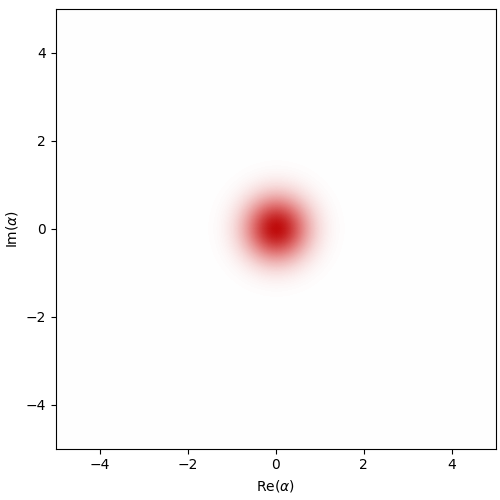

In [6]:
psi0 = dq.fock((na,nb), (0,0))  # coherent state

res = dq.mesolve(H, [jnp.sqrt(Kb)*b, jnp.sqrt(Ka)*a], psi0, t_save)

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a, fps=120)